In [ ]:
### Header: introduce dataset and goals

![Image](./resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Population Coding</h1> 
<h2 align="center"> Day 2, Afternoon Session</h2> 



<br>
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
In the first workshop of today, we examined how sensory variables can be encoded in individual neurons' activity. We now turn our attention to the coordinated activity of groups of neurons: population codes!
    
### How do populations of neurons encode information about sensory stimuli? 
### How are these population codes modulated by context or behavioral state? 
### What other types of thing are encoded in population activity?

In [ ]:
### Replace this section with the standard setup!

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

base_dir = "/Users/gkocker/Documents/projects/swdb_2024_physiology"
data_dir = os.path.join(base_dir, "data")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(data_dir))

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

Grab data from a session

In [3]:
session = cache.get_ecephys_session(
           ecephys_session_id=1065437523)

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


The stimulus presentations table is a record of every stimulus we presented to the mouse over the course of this experiment. The different stimuli are indexed by the 'stimulus_block' column. Let's group this dataframe by stimulus block and see what stimulus was shown for each block.

In [4]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.groupby('stimulus_block')[['stimulus_block', 
                                                'stimulus_name', 
                                                'active', 
                                                'duration', 
                                                'start_time']].head()

,stimulus_block,stimulus_name,active,duration,start_time
stimulus_presentations_id,,,,,
0,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.131464
1,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.882028
2,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250232,29.632680
3,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250186,30.383329
4,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250229,31.133886
4797,1,spontaneous,False,10.008420,3648.207579
4798,2,gabor_20_deg_250ms,False,0.250208,3658.215999
4799,2,gabor_20_deg_250ms,False,0.250208,3658.466207
4800,2,gabor_20_deg_250ms,False,0.250208,3658.716415


And, let's see the stimuli that were presented:

In [5]:
stimulus_presentations.columns

Index(['stimulus_block', 'image_name', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'flashes_since_change', 'trials_id', 'stimulus_name', 'position_x',
       'is_sham_change', 'orientation', 'spatial_frequency', 'color',
       'stimulus_index', 'active', 'temporal_frequency', 'contrast',
       'position_y', 'rewarded'],
      dtype='object')

In [6]:
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,orientation,spatial_frequency,color,stimulus_index,active,temporal_frequency,contrast,position_y,rewarded
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False


Now let's get unit and channel data, sort the units by depth and filter for "good" units.

In [7]:
### get unit and channel data, sort the units by depth and filter for "good" units
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

#first let's sort our units by depth and filter
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

In [8]:
good_units.index.values

array([1068232329, 1068230192, 1068232327, ..., 1068230683, 1068232010,
       1068230684])

Which brain structures were recorded from in this session?

In [9]:
unit_channels.value_counts('structure_acronym')

structure_acronym
SGN      260
CA1      228
DG       167
VISpm    165
APN      151
TH       146
VISam    144
VISp     131
VISl     127
VISal    125
MRN      106
VISrl     99
ProS      98
PP        94
PIL       74
PoT       70
CA3       67
SUB       52
LP        24
MGm       21
NOT       18
RN        17
MB        15
POST       2
LT         2
MGv        1
dtype: int64

In [100]:
### Let's look at population activity in an area of interest
area_of_interest = 'VISp'
area_units = good_units[good_units['structure_acronym'] == area_of_interest]
num_units = len(area_units)

In [11]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,orientation,spatial_frequency,color,stimulus_index,active,temporal_frequency,contrast,position_y,rewarded
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,False,NaN,NaN,NaN,-99,False,NaN,NaN,NaN,False


In [12]:
### What stimuli are presented in these blocks?
np.sort(stimulus_presentations['image_name'].unique())

array(['im012_r', 'im036_r', 'im044_r', 'im047_r', 'im078_r', 'im083_r',
       'im111_r', 'im115_r', 'omitted'], dtype=object)

### Let's start by looking at the neural activity! Does it reflect the image presentation?

(0.0, 72.0)

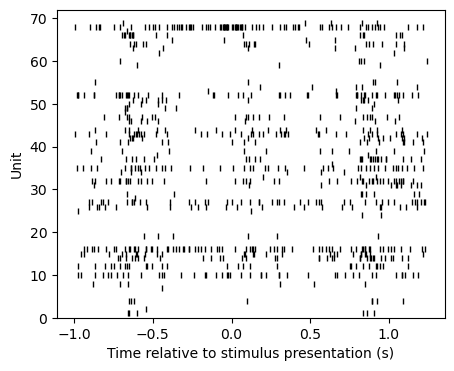

In [108]:
### plot a single-trial raster, population PSTH, and representation matrix
pre_time = 1
post_time = 1

plt.figure(figsize=(5,4))

presentation_idx = 1
start_time = stimulus_presentations['start_time'][presentation_idx] 
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time - pre_time) * (unit_spike_times < end_time + post_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times - start_time, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time relative to stimulus presentation (s)')
plt.ylabel('Unit')
plt.ylim((0, num_units+1))

### Let's compare to a change trial.

(0.0, 71.0)

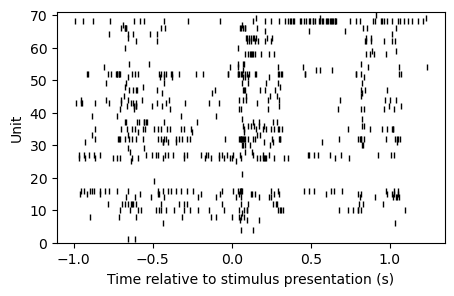

In [107]:

### plot a single-trial raster, population PSTH, and representation matrix
plt.figure(figsize=(5, 3))

change_idx = np.where(stimulus_presentations['is_change'].values)[0]
presentation_idx = change_idx[0]

start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time - pre_time) * (unit_spike_times < end_time + post_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times - start_time, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time relative to stimulus presentation (s)')
plt.ylabel('Unit')
plt.ylim((0, num_units))

### Now let's take a look at the trial-averaged responses to see how a neuron encodes the stimulus in its time-dependent firing rate

In [15]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

In [16]:
### Plot a set of PSTHs
presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = presentations_sorted['image_name'].unique()
good_stim = [p is not np.nan for p in stimuli]
stimuli = stimuli[good_stim]
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

stimulus = stimuli[0]

psths = []
time_before_im = 1
duration = 2

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    presentations = presentations_sorted[presentations_sorted['image_name'] == stimulus]
    num_presentations = len(presentations)
    
    start_times = presentations['start_time'].values
    
    unit_response, bins = makePSTH(unit_spike_times, 
                                      start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)

psths = np.array(psths)

Text(0, 0.5, 'Firing rate (Hz)')

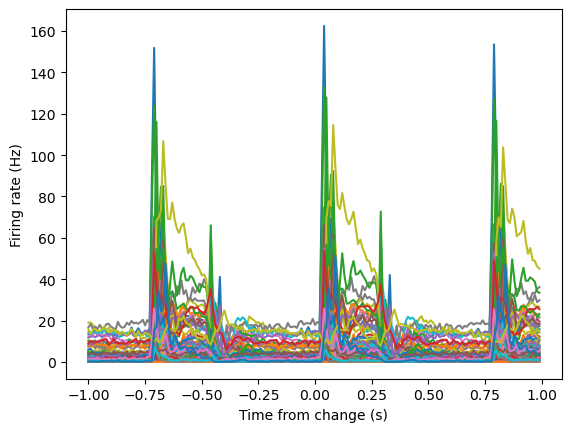

In [17]:
plt.figure()
plt.plot(bins[:-1] - time_before_im, psths.T);
plt.xlabel('Time from change (s)')
plt.ylabel('Firing rate (Hz)')

We can see the trial structure of the task reflected in the PSTH!

## Training a classifier on population spiking data

In order to determine how well we can decode the stimulus direction from population activity, we will train a **classifier** on our matrix of firing rates. Whereas regression models try to predict continuous values from the input features, classification models try to predict *labels* (also known as classes) from the input features.

### Support Vector Machines

Let's start with a linear Support Vector Machine (SVM) classifier, which will try to draw linear boundaries between orientation conditions (the labels) in our 94-dimensional firing rate space.

This cartoon shows how we would expect an SVM to behave on a much simpler dataset, which has two dimensions and three conditions:

![SVM illustration](./resources/svm-classifier.png)

SVM computes decision boundaries in feature space that can be used to classify different conditions. If a new data point appears, the SVM classifier will label it based on where it falls with respect to these boundaries.

To train an SVM, we need to import the following methods from `scikit-learn`:

In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

### First, we need to create a response matrix and vector of stimulus labels.

In [19]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations = stimulus_presentations[stimulus_presentations.active]

num_presentations = len(stimulus_presentations)
stimulus_presentations.head()

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,orientation,spatial_frequency,color,stimulus_index,active,temporal_frequency,contrast,position_y,rewarded
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,NaN,NaN,-99,True,NaN,NaN,NaN,False


In [21]:
def make_response_array(spike_times, stimulus_presentations, units, window=.05):

    '''
    Create an array of spike counts x stimulus presentations, and a corresponding list of stimulus label
    spike_times: spike times 
    stimulus_presentation: stimulus presentation table
    units: units table containing only the units to get the responses of
    '''
    
    labels = []
    responses = []

    presentation_num = 0

    for presentation_idx, presentation in stimulus_presentations.iterrows():    
        start_time = stimulus_presentations['start_time'][presentation_idx]
        end_time = stimulus_presentations['end_time'][presentation_idx]
        duration = end_time - start_time

        if np.isnan(duration):
            continue
            
        if window > duration:
            print('Warning: window size longer than stimulus presentation')

        labels.append(presentation.image_name)

        unit_num = 0

        presentation_responses = np.zeros((num_units,))

        for iu, unit in units.iterrows():
            unit_spike_times = spike_times[iu]
            presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < start_time+window)]

            presentation_responses[unit_num] = len(presentation_spike_times) / duration

            unit_num += 1

        responses.append(presentation_responses)
        presentation_num += 1

    responses = np.array(responses)
    labels = np.array(labels)
    
    return responses, labels

### Note: creating the response matrix might take a minute.

In [44]:
responses, labels = make_response_array(spike_times, stimulus_presentations, area_units, window=.02)

We will first select a random subset of trials for training the classifier:

In [45]:
total_presentations = responses.shape[0]
num_train = int(total_presentations * 0.5) # Use 50% of trials for training
random_trial_order = np.random.permutation(responses.shape[0])
train_indices = random_trial_order[:num_train]

training_data = responses[train_indices]
training_labels = labels[train_indices]

Next, we'll create the model and fit it to our training data:

In [46]:
clf = svm.SVC()
clf.fit(responses[train_indices], labels[train_indices])

SVC()

Now that our model has been trained, we can ask it to classify unlabeled data (i.e., the sets of population firing rates that were not included in our original training set):

In [47]:
test_indices = random_trial_order[num_train:]
test_data = responses[test_indices]
predicted_labels = clf.predict(responses[test_indices])

We can compare the predicted labels to the actual labels in order to assess the classifier's performance:

In [48]:
def convert_labels_to_int(labels, conditions):

    conversion_dict = {}
    for i, label in enumerate(conditions):
        conversion_dict[label] = i

    labels_as_int = [conversion_dict[l] for l in labels]

    return labels_as_int    
    

In [49]:
conditions = np.unique(labels)

actual_labels = labels[test_indices]
accuracy = np.mean(actual_labels == predicted_labels)

print('Accurary: {}'.format(accuracy))
print('Chance level: {}'.format(1/len(conditions)))

Accurary: 0.1917465610671113
Chance level: 0.1111111111111111


We see that we perform better than chance, but not very well! We can get a better sense of classification performance by using the `scikit-learn.model_selection.KFold` iterator to automatically split up the data into "train" and "test" sets for 5 iterations. Note that the model is fit independently on each iteration.

In [50]:
accuracies = []
confusions = []

conditions = np.unique(labels)
num_splits = 5

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
    
    clf = svm.SVC()
#     clf = RandomForestClassifier(min_samples_leaf=20)
#     clf = LinearDiscriminantAnalysis()

    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)    
    print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

0.190625
0.196875
0.1845672575599583
0.18665276329509906
0.1678832116788321

mean accuracy: 0.18532064650677788
chance: 0.1111111111111111


The 5-fold cross-validation roughly agrees with our previous result. Are there particular stimuli that drive the errors? Do assess this we'll look at the confusion matrix, which tells us how frequently stimulus 1 is predicted when any stimulus is shown (and so on).

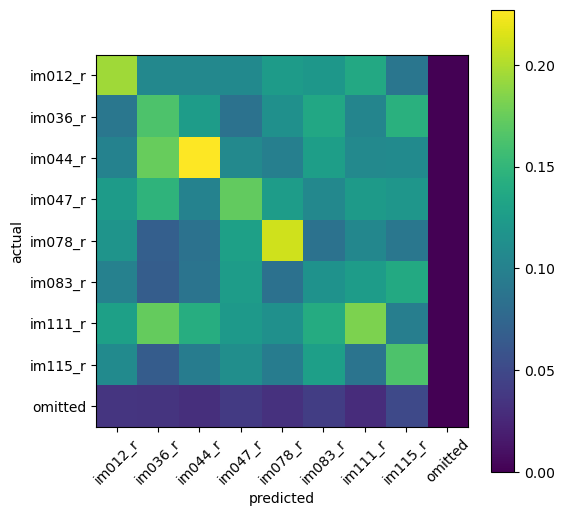

In [51]:
def plot_confusion_matrix(confusions, conditions):
    
    plt.figure(figsize=(6,6))
    
    mean_confusion = np.mean(confusions, axis=0)

    plt.imshow(mean_confusion)
    plt.colorbar()
    
    plt.xticks(range(len(conditions)), conditions, rotation=45)
    plt.yticks(range(len(conditions)), conditions)

    plt.xlabel("predicted")
    plt.ylabel("actual")
    
plot_confusion_matrix(confusions, conditions)

What structure do you see in the confusion matrix?

## Exploring the time course of visual information 


Next we'll examine the time course of information in our population! Or more specifically: how the length of the spike count window affects the decoding accuracy. Can we decode the stimulus perfectly if we integrate spikes for long enough? First, let's try decoding with a longer response window:

In [60]:
responses, labels = make_response_array(spike_times, stimulus_presentations, area_units, window=.1)

0.9895833333333334
0.9895833333333334
0.9916579770594369
0.9916579770594369
0.9916579770594369

mean accuracy: 0.9908281195689955
chance: 0.1111111111111111


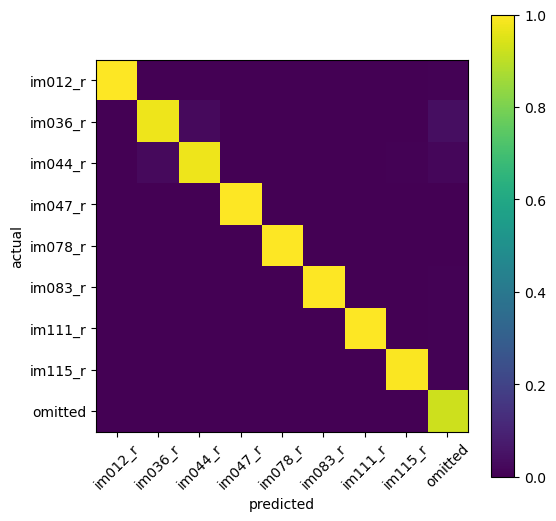

In [61]:
accuracies = []
confusions = []

conditions = np.unique(labels)
num_splits = 5

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
    
#     clf = svm.SVC(gamma="scale", kernel="rbf")
#     clf = RandomForestClassifier(min_samples_leaf=20)
    clf = LinearDiscriminantAnalysis()

    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)    
    print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

plot_confusion_matrix(confusions, conditions)

With a long response window we can decode the stimulus perfectly! How long do we need to integrate spikes for to do so?

In [62]:
window_lengths = np.arange(.01, .1, .02)

In [63]:
accuracies = np.zeros((len(window_lengths), num_splits))

for i, window in enumerate(window_lengths):
    print('{}/{}'.format(i, len(window_lengths)))
    responses, labels = make_response_array(spike_times, stimulus_presentations, area_units, window)
    
    k = 0
    for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
        clf = svm.SVC()
        clf.fit(responses[train_indices], labels[train_indices])

        test_targets = labels[test_indices]
        test_predictions = clf.predict(responses[test_indices])

        accuracies[i, k] = np.mean(test_targets == test_predictions)        
              
        k += 1

0/5
1/5
2/5
3/5
4/5


Text(0, 0.5, 'Accuracy')

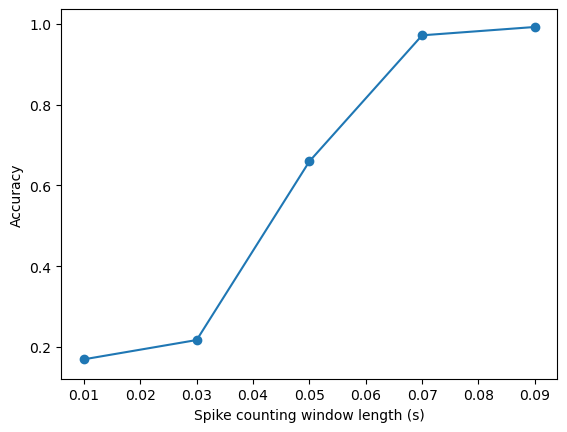

In [65]:
plt.figure()
plt.errorbar(x=window_lengths, y=accuracies.mean(axis=(1)), yerr=accuracies.std(axis=(1)), fmt='o-')

plt.xlabel('Spike counting window length (s)')
plt.ylabel('Accuracy')

## Relationship between population size and decoding accuracy

Next we'll examine how the size of the simultaneously recorded population affects decoding accuracy. In any physiology experiment, we only have a very small window into the overall population response. For example, there are about 500,000 neurons in mouse V1, so in this case we are measuring around 0.02% of the firing rates in this region.

As the number of simultaneously recorded neurons increases, we expect that our ability to decode stimulus identity will improve. 

### To start with, let's try decoding with a random sample of 10 neurons


mean accuracy: 0.5328221671880431
chance: 0.1111111111111111


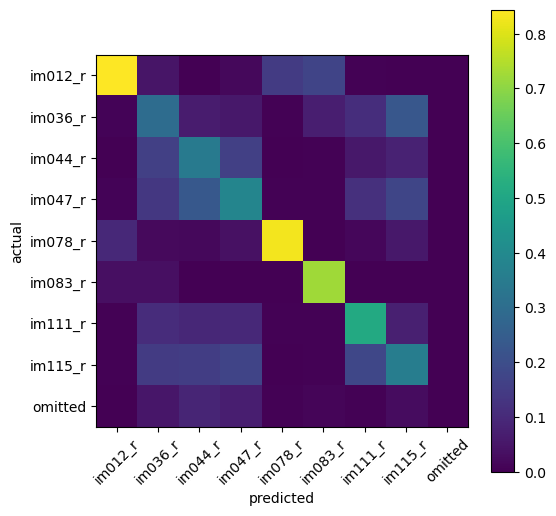

In [66]:
pop_size = 10

pop_idx = np.random.choice(range(num_units), size=pop_size)
responses_pop = responses[:, pop_idx]

accuracies = []
confusions = []

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
    clf = svm.SVC()
    clf.fit(responses_pop[train_indices], labels[train_indices])

    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses_pop[test_indices])

    accuracy = np.mean(test_targets == test_predictions)    

    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

plot_confusion_matrix(confusions, conditions)

Does the result depend on which 10 neurons we sampled? Let's try another random sample.


mean accuracy: 0.5028152155022593
chance: 0.1111111111111111


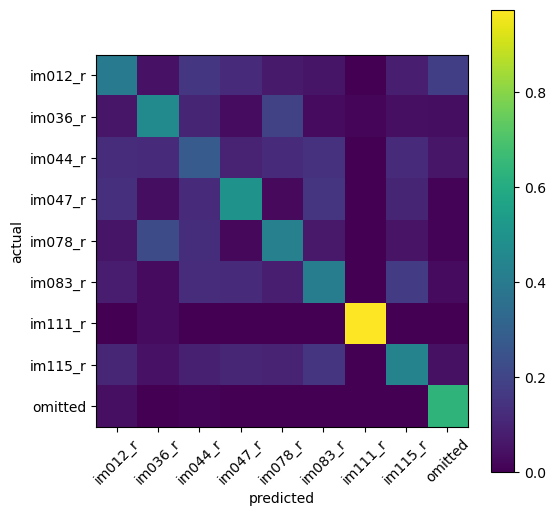

In [67]:
pop_idx = np.random.choice(range(num_units), size=pop_size)
responses_pop = responses[:, pop_idx]

accuracies = []
confusions = []

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
    clf = svm.SVC()
    clf.fit(responses_pop[train_indices], labels[train_indices])

    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses_pop[test_indices])

    accuracy = np.mean(test_targets == test_predictions)    

    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

plot_confusion_matrix(confusions, conditions)

### Now, let's try to get a sense for how this changes with the number of neurons we use to train the classifier.

In [68]:
pop_sizes = np.arange(1, 50, 5).astype('int')
num_resamples = 10

accuracies = np.zeros((len(pop_sizes), num_resamples, num_splits))

for i, pop_size in enumerate(pop_sizes):
    print('population size: {}'.format(pop_size))

    for j in range(num_resamples):
        pop_idx = np.random.choice(range(num_units), size=pop_size)
        responses_pop = responses[:, pop_idx]

        k = 0
        for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
            clf = svm.SVC()
            clf.fit(responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(responses_pop[test_indices])

            accuracy = np.mean(test_targets == test_predictions)    

            accuracies[i, j, k] = accuracy
            k += 1

population size: 1
population size: 6
population size: 11
population size: 16
population size: 21
population size: 26
population size: 31
population size: 36
population size: 41
population size: 46


Text(0, 0.5, 'Accuracy')

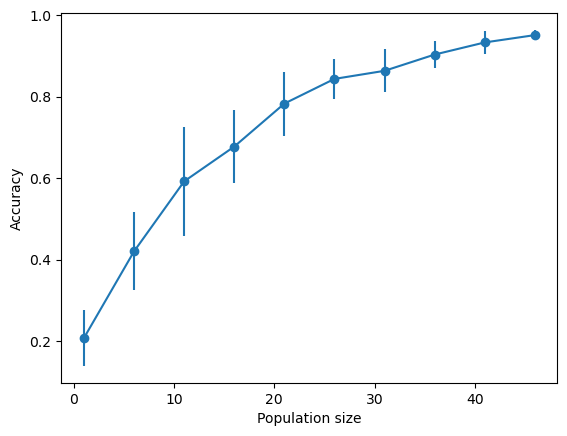

In [70]:
plt.figure()
plt.errorbar(x=pop_sizes, y=accuracies.mean(axis=(1, 2)), yerr=accuracies.std(axis=(1, 2)), fmt='o-')

plt.xlabel('Population size')
plt.ylabel('Accuracy')

Roughly how many neurons do you need to decode with 50% accuracy? 80%? 90%?

## Exploring correlations between neurons

Finally, we turn to examine the structure of the population activity.
Does the structure of the population activity matter for this decoding, or is single-neuron tuning the whole name of the game? For example, if neurons 1 and 2 are co-active on trial 1 (both above their individual mean activity), does that carry any extra information? To explore this, we'll look at correlations between their responses.

<!-- Based on the plot above, it's clear that neurons are correlated with one another. For example, look at units 35-40 and notice how they tend to have high firing rates or low firing rates on similar trials. -->

We'll look at this correlation in much more detail below, but we should first note some assumptions. Primarily, we are studying *spike counts*, or rates within time windows defined by the stimulus. This assumes that all spikes within the windows are equivalent, no matter their relative timing. It also assumes a specific set of time windows (set by the stimulus). In some cases, these assumptions may not be desirable (e.g., in studies of time-lagged spike-spike correlation, frequently used in studies of functional connectivity.)

With that tangent aside, let's return to our observation that the neurons' activities (defined here by spike rates) are correlated.

<!-- The activities of correlated neural populations have a *lower dimensionality* than the number of neurons. For example, for two perfectly correlated neurons, a single number suffices to describe both of their firing rates. This same idea applies to larger populations, and to less-than-perfect correlations. -->

<!-- To explore this property, we will apply the most common dimensionality reduction technique in existence to these data: Principal Component Analysis (PCA). This is a linear dimensionality reduction method (more on this later), and it works by considering the space of all possible neuron responses, wherein each axis of the space is a single neuron's firing rate. PCA finds the directions in this space along which the activities are the most spread out (highest variance) or the least spread out. -->

## Computing correlation matrices

So far, we have looked at the covariance between neurons. For the following analysis, we will instead look at Pearson correlations instead of covariance: the Pearson correlation for a pair of neurons is the covariance divided by the product of the neurons' standard deviations. This normalizes the measure so that its maximum is 1 and minimum is -1, which makes it easier to interpret than covariances.

So far, we have not considered how much of the covariance or correlation is stimulus-driven (e.g., reflecting neurons with similar tuning responding to the same stimulus at the same time) vs arising from other sources. 

The correlations due to the stimulus properties are called *signal correlations*, whereas correlations due to other sources (including random variability within the eyes and the brain) are called *noise correlations*. The correlations we considered above encapsulate both of these factors, and are called *total* correlations.

To separate these out, we'll now compute and compare all 3 (Pearson) correlation matrices: the total correlations, signal correlations, and noise correlations.

First, the total correlations (using `np.corrcoef`):

/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Unit #')

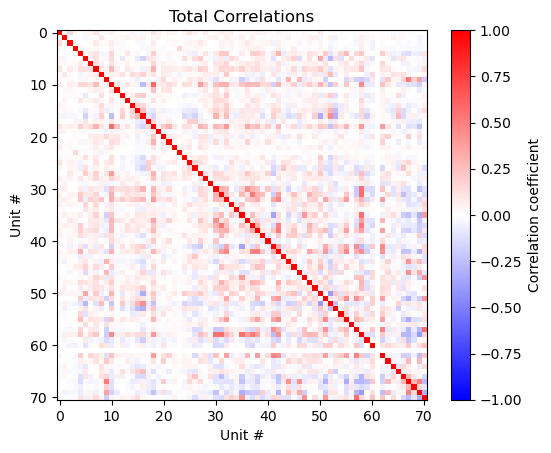

In [71]:
total_correlations = np.corrcoef(responses.T)
plt.imshow(total_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar(label='Correlation coefficient')
plt.title('Total Correlations')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Next, we'll compute the signal correlations. These are the correlations in the neurons' average response to each stimulus (defined by orientation), computed across stimuli. As the name implies, they tell us how much two neurons' mean (trial averaged) activities co-vary as the stimulus changes.

To compute these, we'll first calculate the average activities for each stimulus identify and neuron, then compute the correlation matrix across stimuli.

In [72]:
### Compute tuning curves - takes a few minutes

presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = np.sort(presentations_sorted['image_name'].unique())
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

durations = []

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    for j, stim in enumerate(stimuli):
        presentations = presentations_sorted[presentations_sorted['image_name'] == stim]
        num_presentations = len(presentations)
        
        for presentation_idx, presentation in presentations.iterrows():
            start_time = presentations['start_time'][presentation_idx]
            end_time = presentations['end_time'][presentation_idx]
            duration = end_time - start_time
            durations.append(duration)
            
            presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    
            tuning_curves[unit_num, j] += len(presentation_spike_times) / duration / num_presentations
    unit_num += 1

Text(0, 0.5, 'Firing rate')

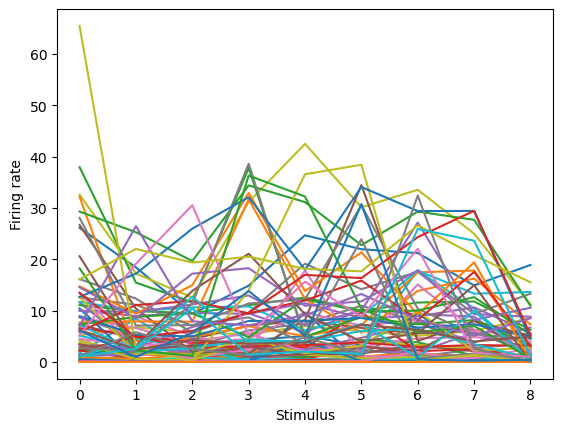

In [73]:
plt.figure()
plt.plot(tuning_curves.T);
plt.xlabel('Stimulus')
plt.ylabel('Firing rate')

The signal correlation matrix is the correlation of neuron's trial-averaged responses---the similarity of their tuning curves.

Text(0, 0.5, 'Unit #')

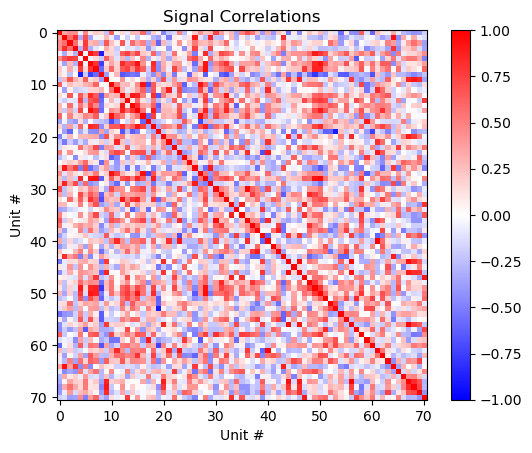

In [74]:
signal_correlations = np.corrcoef(tuning_curves)
plt.imshow(signal_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Signal Correlations')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Finally, let's compute the noise correlations. These are the correlations in the responses to each stimulus, reflecting the (correlated) trial-to-trial variability in the neural population. These correlations can come from synaptic connections (or indirect connections) between the neurons, so that when neuron A fires more on a given trial, neuron B also fires more (excitatory connection), or neuron B fires less (inhibitory connection). The noise correlations can also come from shared input. For example, if neuron C has an excitatory projection to both neurons A and B, then on trials where neuron C has increased firing rate, then both neurons A and B will also show increased firing.

These noise correlations are defined on a per-stimulus basis and can vary somewhat between stimuli. For sake of interest, we'll plot below the correlation matrices for two different stimuli, and we'll later make use of the average correlation matrix (averaged over all 8 orientations).

Since noise correlations are single-trial correlations, if a neuron does not respond to a particular stimulus condition it can generate NaNs. To ignore these, we use numpy's masked array module, numpy.ma.

In [75]:
noise_correlations = np.zeros((len(conditions), num_units, num_units)) # initialize the noise correlation matrix for each stimulus condition

for i, condition in enumerate(conditions):
    condition_idx = np.where(labels == condition)
    responses_condition = responses[condition_idx]
    responses_condition = np.ma.masked_invalid(responses_condition)
    
    noise_correlations[i] = np.ma.corrcoef(responses_condition.T)

Text(0, 0.5, 'Unit #')

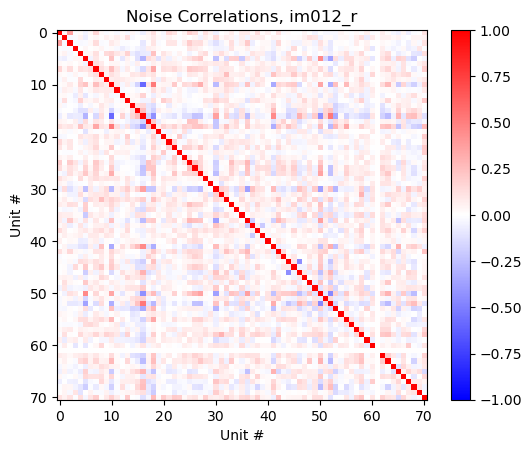

In [76]:
plot_condition_idx = 0

plt.imshow(noise_correlations[plot_condition_idx], cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, {}'.format(conditions[plot_condition_idx]))
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Text(0, 0.5, 'Unit #')

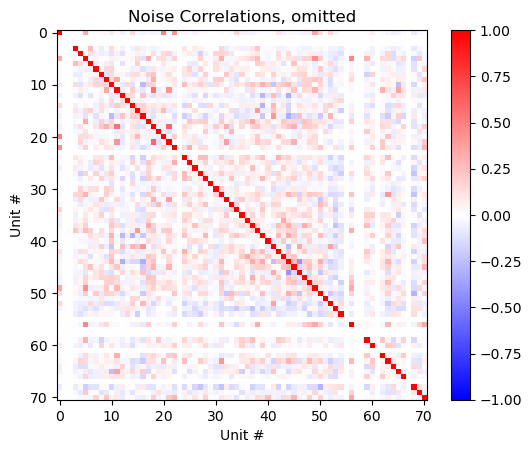

In [77]:
plot_condition_idx = -1

plt.imshow(noise_correlations[plot_condition_idx], cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, {}'.format(conditions[plot_condition_idx]))
plt.xlabel('Unit #')
plt.ylabel('Unit #')

Note that noise correlations can vary between stimuli! What differences do you see between these two noise correlation matrices?

To get an overall view of the noise correlations, we average them across stimuli:

Mean noise correlation: 0.009585341993168966


Text(0, 0.5, 'Unit #')

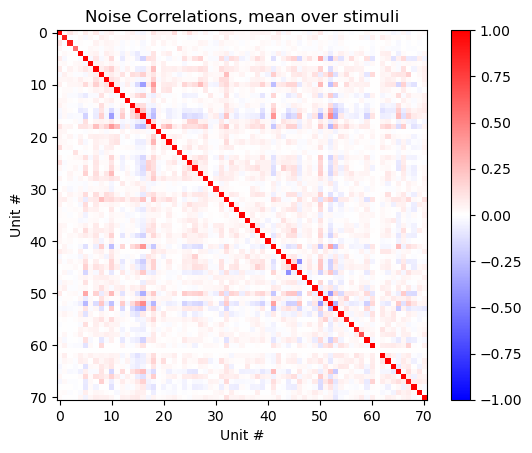

In [78]:
mean_noise_correlations = np.mean(noise_correlations,axis=0)

print('Mean noise correlation: {}'.format(np.mean(np.triu(mean_noise_correlations, 1))))

plt.imshow(mean_noise_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations, mean over stimuli')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

A common interpretation of noise correlations is that they can arise from synapses between, or common input to, a pair of neurons. These can also affect (or, through Hebbian learning, reflect) stimulus tuning. So we might expect noise and signal correlations to be correlated. Are they?

Mean Noise Correlation:
0.019444550900428473
Mean Signal Correlation:
0.11182816136061455


Text(0, 0.5, 'Noise Correlation')

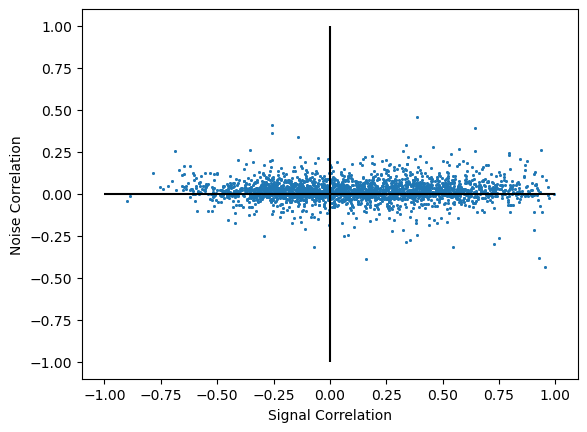

In [79]:
ncorr = np.matrix.flatten(mean_noise_correlations)
diagonal_indices = np.diag_indices(num_units, ndim=2) 
flat_diagonal_indices = np.ravel_multi_index(diagonal_indices, dims=(num_units, num_units))
ncorr = np.delete(ncorr, flat_diagonal_indices)

print('Mean Noise Correlation:')
print(np.mean(ncorr))

scorr = np.matrix.flatten(signal_correlations)
scorr = np.delete(scorr,flat_diagonal_indices)

print('Mean Signal Correlation:')
print(np.mean(scorr))

plt.scatter(scorr,ncorr,s=1)
plt.hlines(0,-1,1,colors='black')
plt.vlines(0,-1,1,colors='black')
plt.xlabel('Signal Correlation')
plt.ylabel('Noise Correlation')

At first these look ~unrelated to each other! If we look closer, we'll note that there is a small (but statistically quite significant) trend for neuron pairs with higher signal correlation to have higher noise correlation, and vice versa.

For this, we'll use the scipy pearsonr function instead of numpy corrcoef, because it returns a p-value from the hypothesis test where the null hypothesis is zero correlation.

In [82]:
from scipy.stats import pearsonr
pearsonr(ncorr,scorr)

PearsonRResult(statistic=0.016822268456060857, pvalue=0.23573064777301192)

Various computational models make predictions about the relation between noise and signal correlations. For example, the local competition algorithm for sparse coding, which was once a leading theory of V1 computation, predicts a negative relationship between noise and signal correlations.

## Population decoding with and without noise correlations

While the noise correlations are weak, it is worth asking whether or not -- from an information processing standpoint -- we can treat each neuron as independent. In other words, are the noise correlations weak enough that they can be ignored?

To test this, we'll return to our decoding analysis, and we will try decoding from synthetic data in which we artificially remove the noise correlations. We do this by trial-shuffling the neural data. This creates a fake dataset in which non-simultaneously-recorded neural activities are assembled to make the population response vectors, and it removes the noise correlations.

To do this, we go through the data, and for each stimulus, and for each neuron, we randomly (and independently) re-order the trials.

In [83]:
def trial_shuffle_responses(responses, conditions):
    
    shuffled_responses = responses.copy()

    for i, condition in enumerate(conditions):
        condition_idx = np.where(labels == condition)

        for j in range(num_units):
            responses_unit_condition = responses[condition_idx, j].reshape(-1).copy()
            np.random.shuffle(responses_unit_condition) # shuffle in place
            shuffled_responses[condition_idx, j] = responses_unit_condition
            
    return shuffled_responses

shuffled_responses = trial_shuffle_responses(responses, conditions)

First, let's double-check that our shuffling worked correctly.

In [84]:
shuffled_noise_correlations = np.zeros((len(conditions), num_units, num_units)) # initialize the noise correlation matrix for each stimulus condition

for i, condition in enumerate(conditions):
    condition_idx = np.where(labels == condition)
    responses_condition = shuffled_responses[condition_idx]
    responses_condition = np.ma.masked_invalid(responses_condition)
    
    shuffled_noise_correlations[i] = np.ma.corrcoef(responses_condition.T)

Mean noise correlation after trial shuffling: -3.5875571601482914e-05


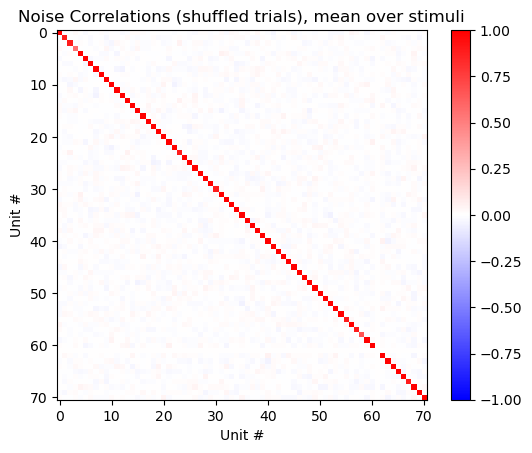

In [85]:
mean_shuffled_noise_correlations = np.mean(shuffled_noise_correlations,axis=0)

plt.imshow(mean_shuffled_noise_correlations, cmap='bwr', clim=(-1,1))
plt.colorbar()
plt.title('Noise Correlations (shuffled trials), mean over stimuli')
plt.xlabel('Unit #')
plt.ylabel('Unit #')

print('Mean noise correlation after trial shuffling: {}'.format(np.mean(np.triu(mean_shuffled_noise_correlations, 1))))

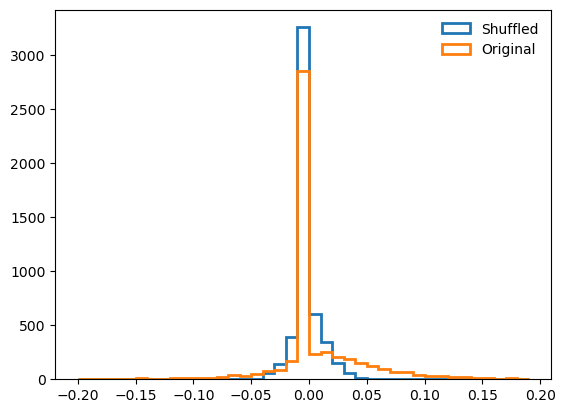

In [86]:
bins=np.arange(-.2, .2, .01)

plt.figure()
plt.hist(np.triu(mean_shuffled_noise_correlations, 1).reshape(-1,), bins=bins, histtype='step', linewidth=2, label='Shuffled')
plt.hist(np.triu(mean_noise_correlations, 1).reshape(-1,), bins=bins, histtype='step', linewidth=2, label='Original')
plt.legend(loc=0, frameon=False)

We can see that while the noise correlations in the original data are small, they exhibit a positive tail absent in the shuffled data. Now let's decode from the trial-shuffled responses!

In [87]:
accuracies_shuffled = []
confusions_shuffled = []

for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):

    clf = svm.SVC()

    clf.fit(shuffled_responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(shuffled_responses[test_indices])
    
    accuracy = np.mean(test_targets == test_predictions)    
    print(accuracy)
    
    accuracies_shuffled.append(accuracy)
    confusions_shuffled.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions, normalize='pred'))
    
print(f"\nmean accuracy, shuffled trials: {np.mean(accuracies_shuffled)}")
print(f"chance: {1/conditions.size}")

0.99375
0.996875
0.9927007299270073
0.9958289885297185
0.9906152241918665

mean accuracy, shuffled trials: 0.9939539885297185
chance: 0.1111111111111111


# With these analyses in hand, we leave you with some questions:

### If you integrate spikes in a fixed window length, how does the decoding accuracy depend on the time since the image presentation? 

### Do noise correlations impact the decoding on specific timescales or for specific population sizes?

In [88]:
### timescales (fixed population size)

window_lengths = np.arange(.01, .1, .02)

accuracies = np.zeros((len(window_lengths), num_splits))
shuffled_accuracies = np.zeros((len(window_lengths), num_splits))

for i, window in enumerate(window_lengths):
    print('{}/{}'.format(i, len(window_lengths)))
    responses, labels = make_response_array(spike_times, stimulus_presentations, area_units, window)
    shuffled_responses = trial_shuffle_responses(responses, conditions)
    
    k = 0
    for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses):
        clf = svm.SVC()
        clf.fit(responses[train_indices], labels[train_indices])

        test_targets = labels[test_indices]
        test_predictions = clf.predict(responses[test_indices])

        accuracies[i, k] = np.mean(test_targets == test_predictions)        
        
        clf.fit(shuffled_responses[train_indices], labels[train_indices])

        test_targets = labels[test_indices]
        test_predictions = clf.predict(shuffled_responses[test_indices])

        shuffled_accuracies[i, k] = np.mean(test_targets == test_predictions) 
              
        k += 1

0/5
1/5
2/5
3/5
4/5


NameError: name 'accuracies_shuffled_corrs' is not defined

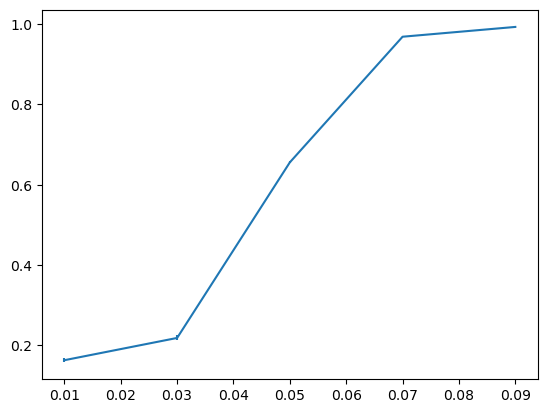

In [89]:
plt.figure()
plt.errorbar(x=window_lengths, y=accuracies.mean(axis=(1)), yerr=accuracies.std(axis=(1)) / np.sqrt(num_splits), fmt='-')
plt.errorbar(x=window_lengths, y=shuffled_accuracies.mean(axis=(1)), yerr=accuracies_shuffled_corrs.std(axis=(1))/ np.sqrt(num_splits), fmt='-')

plt.xlabel('Population size')
plt.ylabel('Accuracy')

In [ ]:
### population sizes (fixed timescale)

window = .2

responses, labels = make_response_array(spike_times, stimulus_presentations, area_units, window)
shuffled_responses = trial_shuffle_responses(responses, conditions)

accuracies = np.zeros((len(window_lengths), num_resamples, num_splits))
shuffled_accuracies = np.zeros((len(window_lengths), num_splits))

for i, pop_size in enumerate(pop_sizes):
    print('population size: {}'.format(pop_size))
    for j in range(num_resamples):
        pop_idx = np.random.choice(range(num_units), size=pop_size)
        responses_pop = responses[:, pop_idx]
        shuffled_responses_pop = shuffled_responses[:, pop_idx]
        
        k = 0
        for train_indices, test_indices in KFold(n_splits=num_splits, shuffle=True).split(responses_pop):
            clf = svm.SVC()
            clf.fit(responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(responses_pop[test_indices])

            accuracies[i, j, k] = np.mean(test_targets == test_predictions)        

            clf.fit(shuffled_responses_pop[train_indices], labels[train_indices])

            test_targets = labels[test_indices]
            test_predictions = clf.predict(shuffled_responses_pop[test_indices])

            shuffled_accuracies[i, j, k] = np.mean(test_targets == test_predictions) 

            k += 1

In [ ]:
plt.figure()
plt.errorbar(x=pop_sizes, y=accuracies.mean(axis=(1, 2)), yerr=accuracies.std(axis=(1, 2)) / np.sqrt(num_resamples*num_splits), fmt='-')
plt.errorbar(x=pop_sizes, y=accuracies_shuffled_corrs.mean(axis=(1, 2)), yerr=accuracies_shuffled_corrs.std(axis=(1, 2))/ np.sqrt(num_resamples*num_splits), fmt='-')

plt.xlabel('Population size')
plt.ylabel('Accuracy')

### Are the accuracy curves different for familiar vs novel images?


### Are the accuracy curves different in active vs passive blocks? Do noise correlations have differential impacts in those blocks?

### Is the structure of the population code different on hit vs miss trials? Can you predict hit vs miss by comparing the lick time to the decoding time course?

### Are other variables, including behavioral variables, also encoded in the population activity? Can you decode the running speed, pupil diameter, or licking behavior?

### What about in a different brain area? For example, is the image encoded in CA1 activity? What about in the joint activity across brain areas?